# Demonstration 3: Sleeping Predator Task

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import SleepingPredator
sns.set_style('white')
sns.set_context('notebook', font_scale=1.3)
img_dir = os.path.join('..','figures')
%matplotlib inline

## Value Iteration

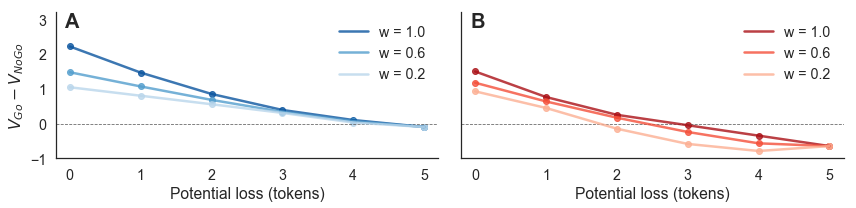

In [2]:
from sisyphus.mdp import ValueIteration

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
weights = [1.0, 0.6, 0.2]

## Environment parameters.
risk = [0.1, 0.15]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize figure.
fig, axes = plt.subplots(1,2,figsize=(12,3),sharex=True,sharey=True)

## Define color palettes.
blues = sns.color_palette('Blues_r', n_colors=6).as_hex()
reds = sns.color_palette('Reds_r', n_colors=6).as_hex()

for i, (ax, p, palette, label) in enumerate(zip(axes, risk, [blues,reds], ['A','B'])):
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Environment setup and visualization.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Initialize environment.
    gym = SleepingPredator(p=p)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Value iteration and visualization.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Iterate over weights.
    for j, w in enumerate(weights):
    
        ## Initialize value iteration.
        qvi = ValueIteration(policy='pessimism', gamma=1.0, w=w)

        ## Solve for Q-values.
        qvi = qvi.fit(gym)
        
        ## Compute Go - NoGo.
        delta = np.diff( qvi.Q[:12].reshape(6,2) )
        delta *= -1    # Make Go - NoGo
        
        ## Plot delta.
        ax.plot(delta, lw=2.5, color=palette[j*2], label='w = %0.1f' %w, alpha=0.8)
        ax.scatter(np.arange(6), delta, color=palette[j*2], alpha=0.8)
        
    ## Add information.
    ax.hlines(0, -0.2, 5.2, color='0.4', lw=0.8, linestyle='--')
    ax.set(xlim=(-0.2, 5.2), xlabel='Potential loss (tokens)', ylim=(-1,3.2))
    if not i: ax.set(ylabel=r'$V_{Go} - V_{NoGo}$')
    ax.legend(loc=1, frameon=False)
    ax.annotate(label, (0,0), (0.025,1), 'axes fraction', fontsize=20, 
                fontweight='bold', ha='left', va='top')
        
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(img_dir, '03_predator.png'), dpi=180)